In [139]:
%load_ext autoreload
import sys
import os
src = os.path.dirname(os.path.abspath(''))
if src not in sys.path: sys.path.append(src)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
import pandas as pd
from matplotlib import pyplot as plt
from src.db.database import connect
from src.helpers.h6_analysis_helpers import get_toplevel_modules, display_counts

## 2 - What are the most popular modules in Data Science Projects coded in Python?
Now that we found out that Python is the most used language, either in python files or in jupyter notebooks , let's find out what are the most used modules and how they are used.

In [141]:
with connect() as session:
    num_repositories = session.execute("SELECT count(id) FROM repositories ").scalar()
    modules = pd.read_sql_table("modules", session.connection())
    modules = get_toplevel_modules(modules)
    print(f"In the {num_repositories} repositories we found {len(modules)} modules in valid python files and jupyter notebooks.")

In the 10 repositories we found 684 modules in valid python files and jupyter notebooks.


#### Most Popular Modules

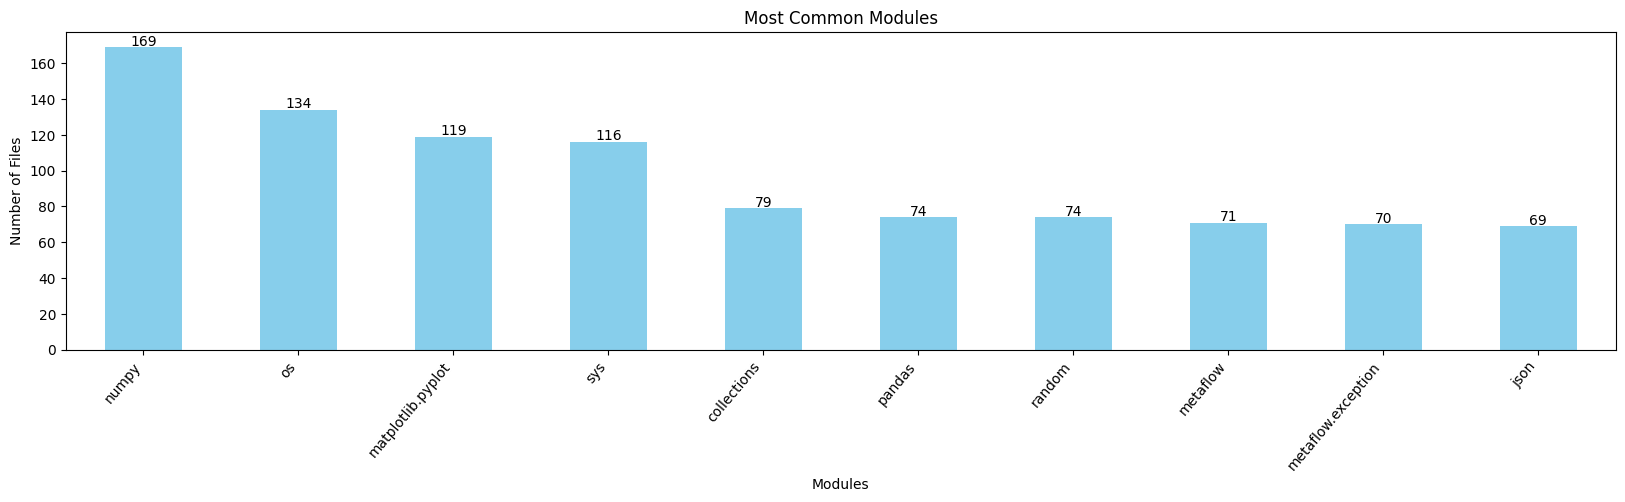

In [142]:
fig1, ax1, count1 = display_counts(modules["any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False,color='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
ax1.legend().set_visible(False)
ax1.set_title("Most Common Modules")
ax1.set_ylabel("Number of Files")
ax1.set_xlabel("Modules");

#### Most Common Toplevel Modules
Since modules can be nested in Python, a top level module is the topmost one in a import.

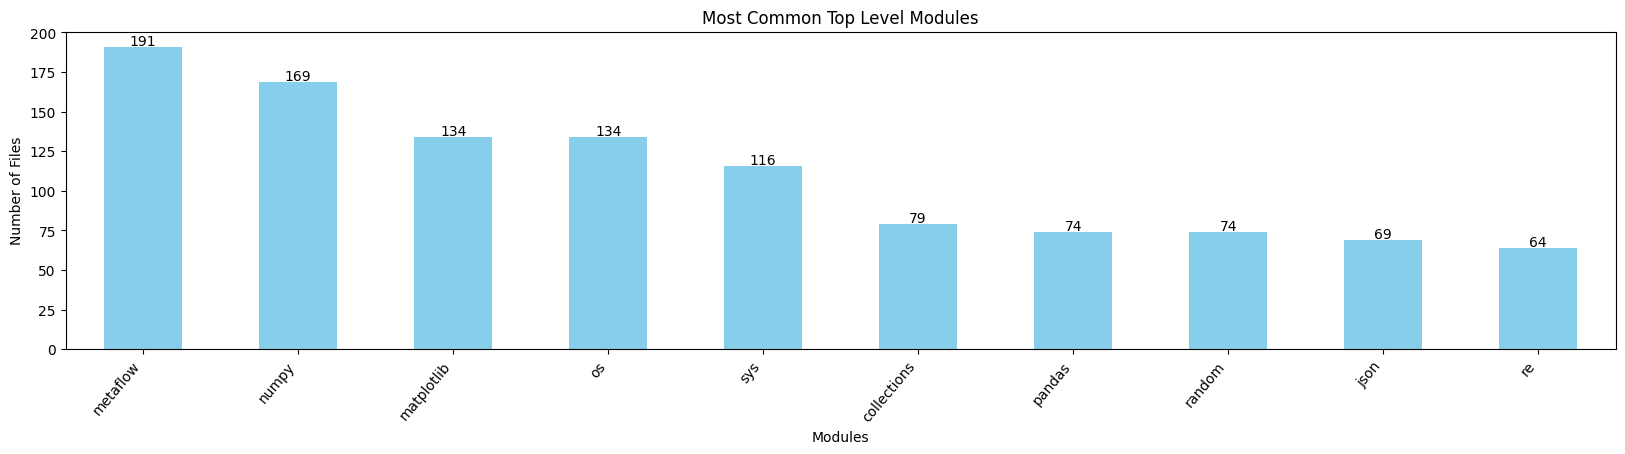

In [143]:
fig2, ax2, count2 = display_counts(modules["toplevel_any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
ax2.legend().set_visible(False)
ax2.set_title("Most Common Top Level Modules")
ax2.set_ylabel("Number of Files")
ax2.set_xlabel("Modules");

#### Most Used Import Types
In Python there are two ways to import modules:
- import: `import numpy`
- import_from: `from sklearn import datasets`

With IPyhton you can also use:
- load_ext: `%load_ext autoreload`

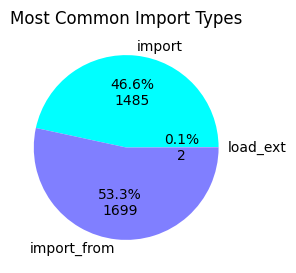

In [144]:
imports = modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]].sum()\
    .rename(lambda x: x[:-6]).rename_axis('Types')\
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig3, ax3 = plt.subplots( figsize=(3,3))
imports.plot\
    .pie(ax=ax3, y="Modules", title="Most Common Import Types",
         labels=["import", "import_from", "load_ext"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()


#### Module Location Type
In Python you can both import local and external modules.

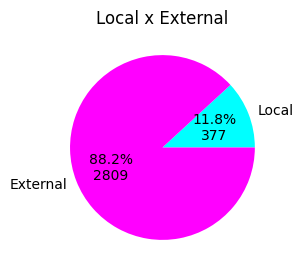

In [145]:
local = modules["local_any_count"].sum()
external = modules["external_any_count"].sum()
location = pd.DataFrame({'Type':['local','external'], 'Modules':[local,external]})

fig4, ax4 = plt.subplots( figsize=(3,3))
location.plot\
    .pie(ax=ax4, y="Modules", title="Local x External",
         labels=["Local", "External"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()

### 2.1 - Jupyter Notebooks
How are modules used in the Jupyter Notebooks we found specifically.

In [146]:
query = (
        "SELECT count(id) FROM notebooks "
        "WHERE NOT (kernel = 'no-kernel' AND nbformat = '0') "
        "AND language = 'python' "
        "AND total_cells != 0 "
        "AND processed & 16 = 0 "
    )
valid_notebooks = session.execute(query).scalar()
notebook_modules = modules[modules.type=='notebook']
percentage = len(notebook_modules) / len(modules) *100
print("In the %d valid Jupyter Notebooks we found %d modules (%.2f of %d modules found)"
      % (valid_notebooks, len(notebook_modules), percentage, len(modules)))

In the 278 valid Jupyter Notebooks we found 218 modules (31.87 of 684 modules found)


#### Most Popular Modules

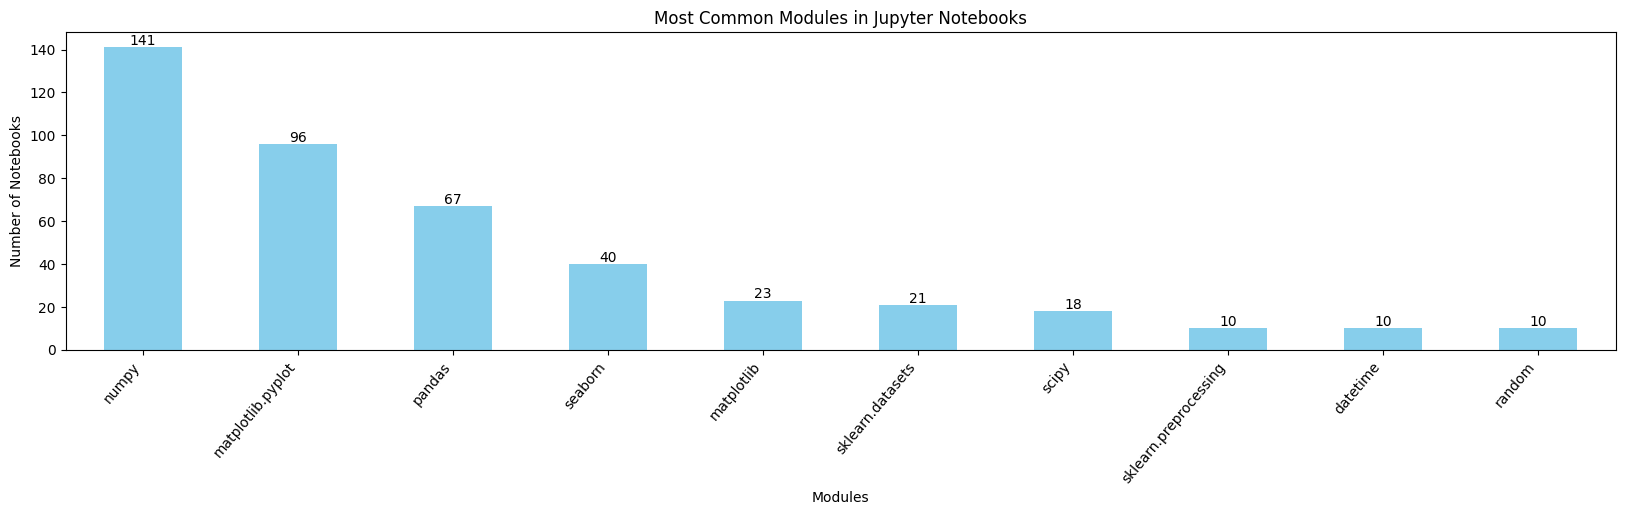

In [147]:
fig5, ax5, count5 = display_counts(notebook_modules["any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False,color='skyblue')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=50, ha="right")
ax5.legend().set_visible(False)
ax5.set_title("Most Common Modules in Jupyter Notebooks")
ax5.set_ylabel("Number of Notebooks")
ax5.set_xlabel("Modules");

#### Most Common Toplevel Modules

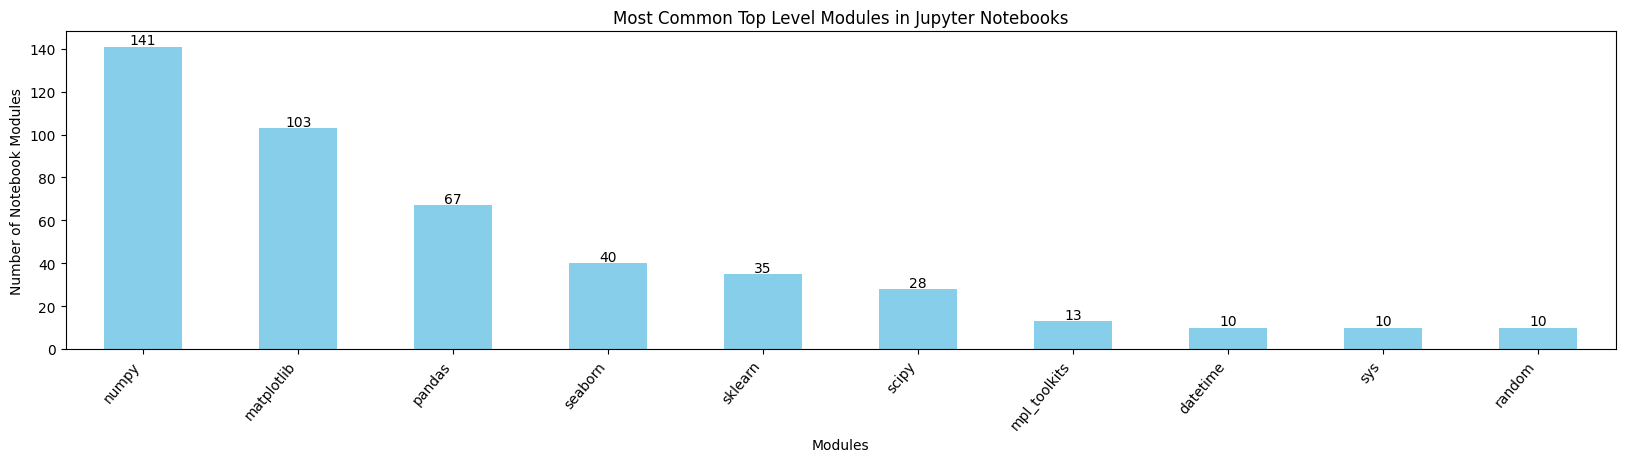

In [148]:
fig6, ax6, count6 = display_counts(notebook_modules["toplevel_any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=50, ha="right")
ax6.legend().set_visible(False)
ax6.set_title("Most Common Top Level Modules in Jupyter Notebooks")
ax6.set_ylabel("Number of Notebook Modules")
ax6.set_xlabel("Modules");

#### Most Used Import Types

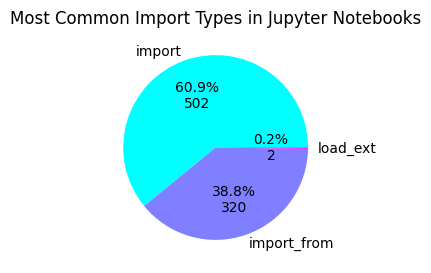

In [149]:
imports = notebook_modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]].sum()\
    .rename(lambda x: x[:-6]).rename_axis('Types')\
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig7, ax7 = plt.subplots( figsize=(3,3))
imports.plot\
    .pie(ax=ax7, y="Modules", title="Most Common Import Types in Jupyter Notebooks",
         labels=["import", "import_from", "load_ext"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()

#### Module Location Type

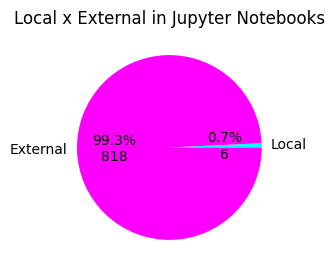

In [150]:
local = notebook_modules["local_any_count"].sum()
external = notebook_modules["external_any_count"].sum()
location = pd.DataFrame({'Type':['local','external'], 'Modules':[local,external]})

fig8, ax8 = plt.subplots( figsize=(3,3))
location.plot\
    .pie(ax=ax8, y="Modules", title="Local x External in Jupyter Notebooks",
         labels=["Local", "External"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()

### 2.2 - Python Files
How are modules used in the Jupyter Notebooks we found specifically.

In [151]:
query = (
        "SELECT count(id) FROM python_files "
        "WHERE  total_lines!= 0 "
        "AND processed & 16 = 0 "
    )
valid_python_files = session.execute(query).scalar()
python_file_modules = modules[modules.type=='python_file']

percentage = len(python_file_modules) / len(modules) *100
print("In the %d valid Python Files we found %d modules (%.2f of %d modules found)"
      % (valid_python_files, len(python_file_modules), percentage, len(modules)))

In the 437 valid Python Files we found 466 modules (68.13 of 684 modules found)


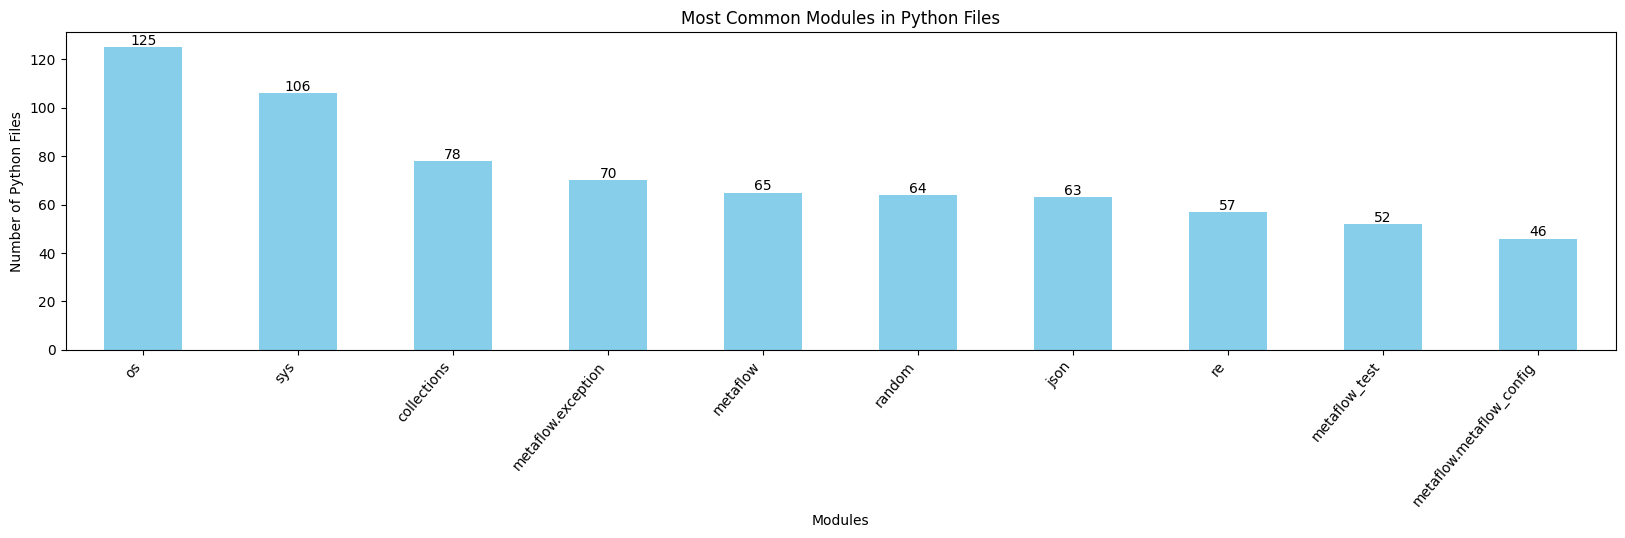

In [152]:
#### Most Popular Modules
fig9, ax9, count9 = display_counts(python_file_modules["any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=50, ha="right")
ax9.legend().set_visible(False)
ax9.set_title("Most Common Modules in Python Files")
ax9.set_ylabel("Number of Python Files")
ax9.set_xlabel("Modules");

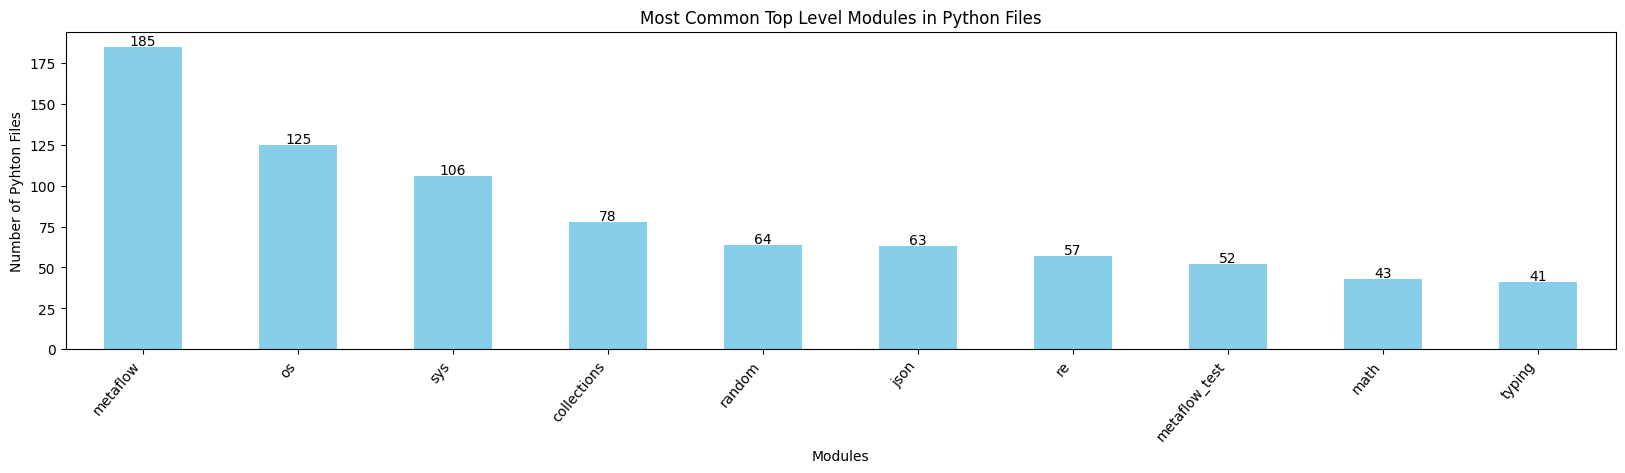

In [153]:
#### Most Common Toplevel Modules
fig10, ax10, count10 = display_counts(python_file_modules["toplevel_any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=50, ha="right")
ax10.legend().set_visible(False)
ax10.set_title("Most Common Top Level Modules in Python Files")
ax10.set_ylabel("Number of Pyhton Files")
ax10.set_xlabel("Modules");

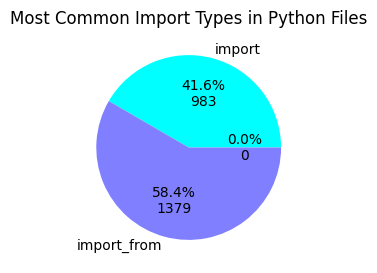

In [154]:
#### Most Used Import Types
imports = python_file_modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]].sum() \
    .rename(lambda x: x[:-6]).rename_axis('Types') \
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig11, ax11 = plt.subplots(figsize=(3, 3))
imports.plot \
    .pie(ax=ax11, y="Modules", title="Most Common Import Types in Python Files",
         labels=["import", "import_from", "load_ext"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (imports["Modules"].sum()) * prct_value / 100))) \
    .get_legend().remove()

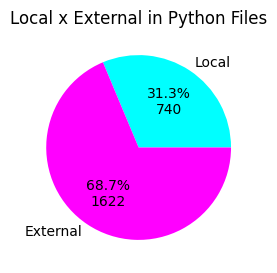

In [155]:
#### Module Location Type
local = python_file_modules["local_any_count"].sum()
external = notebook_modules["external_any_count"].sum()
location = pd.DataFrame({'Type': ['local', 'external'], 'Modules': [local, external]})

fig12, ax12 = plt.subplots(figsize=(3, 3))
location.plot \
    .pie(ax=ax12, y="Modules", title="Local x External in Python Files",
         labels=["Local", "External"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (imports["Modules"].sum()) * prct_value / 100))) \
    .get_legend().remove()